In [1]:
import gmsh

In [2]:
gmsh.initialize()
gmsh.option.setNumber("General.Verbosity", 0)

In [3]:
gmsh.model.add("Sphere")
gmsh.option.setNumber("Mesh.LcIntegrationPrecision", 1e-3)
gmsh.option.setNumber("Mesh.CharacteristicLengthExtendFromBoundary", 0)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", 0.05)

In [4]:
gmsh.model.occ.addSphere(0, 0, 0, 1)

1

In [5]:
gmsh.model.occ.synchronize()

In [6]:
surface = gmsh.model.getEntities(2)[0]

In [7]:
gmsh.model.addPhysicalGroup(surface[0], [surface[1]], 1)
gmsh.model.setPhysicalName(surface[1], 1, "Surface")

In [8]:
gmsh.model.occ.synchronize()


In [9]:
gmsh.model.mesh.generate(2) 

In [10]:
gmsh.write("sphere.msh")

In [11]:
gmsh.write("sphere.vtk")

In [12]:
gmsh.finalize()

# Attempt one

In [13]:
import numpy as np

In [14]:
indata = np.loadtxt("sec_invariant_strain_0.2.dat")

In [15]:
lon = np.arange(-180, 180, 0.2)
lat = np.arange(-90, 90.2, 0.2)

In [16]:
x, y = np.meshgrid(lon, lat)

In [17]:
data = np.zeros((901, 1800, 3))
data[:, :, 0] = x
data[:,:, 1] = y

In [18]:
indata = indata.reshape((741, 1800, 3))

In [19]:
data[110:-50,:,:] = indata

In [20]:
data = np.transpose(data, axes=[1, 0, 2])

In [21]:
data[:,:, 0].flatten()

array([-180. , -180. , -180. , ...,  179.8,  179.8,  179.8])

In [22]:
data[:,:,1].min(), data[:,:, 1].max()

(-90.0, 90.00000000000256)

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

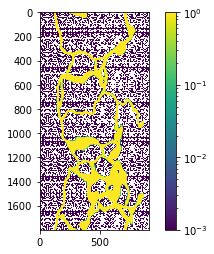

In [24]:
plt.imshow(data[:,:, -1], norm=LogNorm(vmin=0.001, vmax=1))
plt.colorbar()

In [25]:
xmin, xmax = data[:,:,0].min(), data[:,:,0].max()
ymin, ymax = data[:,:,1].min(), data[:,:,1].max()

In [26]:
# value = value + 0.001 * value.max()
# value = value / (100 * value.max())
# value = np.log10(value)

In [27]:
value = data[:, :, -1]
value[value == 0] = 0.01
value = np.log(value)
#value - np.sqrt(value)
#value = value + np.abs(value.min()) + 0.01
#value = 1.0 - (value / value.max())
#value = value + (1.0 - value.max())
#value /= 20
#value += 0.01
value = 1.0 - (value - value.min()) / (value.max() - value.min()) 
value /= 20
value += 0.01

In [28]:
value = data[:, :, -1]
value = 0.01 + (1. - value/value.max()) * 0.2

In [29]:
value.min(), value.max()

(0.01, 0.20999971996680844)

In [30]:
import matplotlib.pyplot as plt

(array([6.200000e+01, 1.330000e+02, 7.200000e+01, 1.150000e+02,
        2.270000e+02, 5.280000e+02, 1.007000e+03, 2.520000e+03,
        9.360000e+03, 1.607776e+06]),
 array([0.01      , 0.02999997, 0.04999994, 0.06999992, 0.08999989,
        0.10999986, 0.12999983, 0.1499998 , 0.16999978, 0.18999975,
        0.20999972]),
 <BarContainer object of 10 artists>)

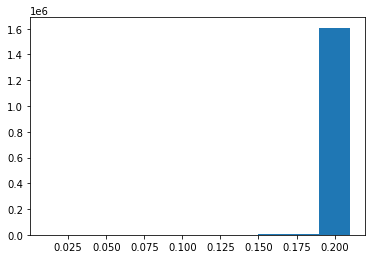

In [31]:
plt.hist(value.flatten(), stacked=True)

In [32]:
value.min(), value.max()

(0.01, 0.20999971996680844)

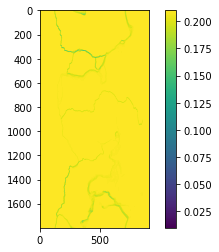

In [33]:
plt.imshow(value)
plt.colorbar()

In [34]:
Ox, Oy, Oz = np.deg2rad(xmin), np.deg2rad(ymin), 0.
Ox, Oy, Oz = np.deg2rad(xmin), np.deg2rad(ymin), 0.
Dx, Dy, Dz = np.deg2rad(0.2), np.deg2rad(0.2), 1.0

In [35]:
with open("test.dat", "w") as f:
    f.write(f"{Ox} {Oy} {Oz}\n")
    f.write(f"{Dx} {Dy} {Dz}\n")
    f.write(f"1800 901 1\n")

In [36]:
with open("test.dat", "a") as f:
    np.savetxt(f, value.flatten(), delimiter="\n")

In [37]:
len(value)

1800

In [38]:
value

array([[0.20999931, 0.20999931, 0.20999931, ..., 0.20999931, 0.20999931,
        0.20999931],
       [0.20999931, 0.20999931, 0.20999931, ..., 0.20999931, 0.20999931,
        0.20999931],
       [0.20999931, 0.20999931, 0.20999931, ..., 0.20999931, 0.20999931,
        0.20999931],
       ...,
       [0.20999931, 0.20999931, 0.20999931, ..., 0.20999931, 0.20999931,
        0.20999931],
       [0.20999931, 0.20999931, 0.20999931, ..., 0.20999931, 0.20999931,
        0.20999931],
       [0.20999931, 0.20999931, 0.20999931, ..., 0.20999931, 0.20999931,
        0.20999931]])